# Clustering

In [15]:
import pandas as pd
import numpy as np

# time calculation to track some processes
import time

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [16]:
__PREPROCESSED_DATA_PATH__ = "../data/preprocessed"

## Import data

In [17]:
df = pd.read_csv(f"{__PREPROCESSED_DATA_PATH__}/clients_df.csv", index_col="pk_cid")
df.shape

(456373, 6)

In [18]:
df.head()

,active_customer_mean,active_customer_last,salary_mean,salary_last,age_mean,age_last
pk_cid,,,,,,
15891,0.500000,0,-1.00,-1.00,59.000000,59
16063,0.714286,0,-1.00,-1.00,62.000000,62
16203,0.833333,1,-1.00,-1.00,70.000000,70
16502,0.888889,1,-1.00,-1.00,57.888889,58
17457,1.000000,1,102405.75,102405.75,53.117647,54


In [19]:
def generate_clusters(min_cluster, max_cluster):
    st = time.time()
    sse = {}
    for k in range(2, 10):
        print(f"Fitting pipe with {k} clusters")
        _clustering_model = KMeans(n_clusters=k)
        _clustering_model.fit(df)
        sse[k] = _clustering_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st) / 60), 2))

    return sse

In [20]:

sse = generate_clusters(2, 10)



Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Elbow curve took 1 minutes.


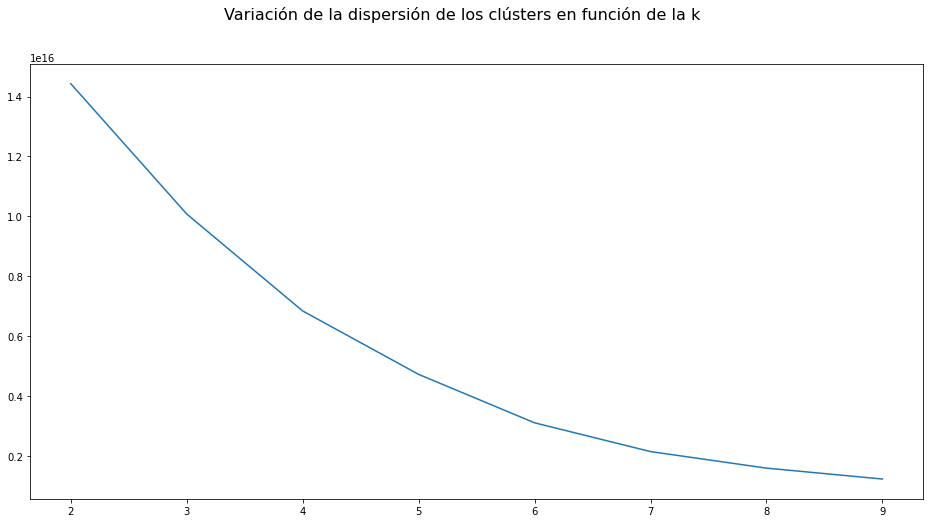

In [21]:
def plot_elbow(sse):
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label="Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize=16)

plot_elbow(sse)

In [22]:
# creamos un dataframe escalado con los pasos 1 - 3 y 5
# X_processed = pipe[:3].transform(df_final)
# X_scaled = pipe["StandardScaler"].transform(X_processed)

# perdemos clientes por el paso 3: clientes con más de 1 pedido o pago, se acaba agrupando en 1 único registro.
# X_scaled.shape

In [23]:
# hacemos el predict, en este caso tendremos para cada cliente su centroide/clúster.

clustering_model = KMeans(n_clusters=6)

clustering_model.fit(df)

labels = clustering_model.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
# pipe["Clustering"]

In [ ]:
# le asignamos al DataFrame procesado los centroides.
# SI LO HACEMOS AL ESCALADO LOS NÚMEROS PERDERAN SU SIGNIFICADO ESCALA Y SERÁN MÁS DÍFICILES DE INTERPRETAR.
# X_processed["cluster"] = labels

In [ ]:
# X_processed.shape

In [ ]:
# visualizamos nuestros grupos en base a las variables del modelo RFM, para ver que tal han quedado.
# selected_columns = ['n_orders', 'amount', 'last_purchase']
#
# sns.pairplot(X_processed, vars=selected_columns, hue='cluster');